<a href="https://colab.research.google.com/github/Venuram/Machine-Learning-ML/blob/master/ICC_World_Cup_Analysis_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> ICC CRICKET WORLD CUP 2019 </b>

This project (Write a Data Science Blog Post) is part of Udacity Data Scientists (Nanodegree Program). For detailed analysis, refer to my Jupyter notebook in the following GitHub link:
https://github.com/Venuram/Machine-Learning-Projects


Cricket is not only a sport in India also a religion that's been worshipped by many even in these modern days. 

World cup tournament is the pinnacle of the sport and it's always fascinating to work and analyze cricket datasets to find insights that might be the X factor in the games. 

<b> Business Understanding </b>

The Dataset consists of Matches that are played after 2012. I am analyzing those matches which are played after 2012 in England.

<b> What am I going to do in this kernel? </b>


1. How many matches are played in those venues after 2012?

2. What's the winning Percentage of WC Teams?

3. Does Batting First or Second matter in these pitches?

4. Who has the Best Batting Average?

5. Who has the best Economy?


In [ ]:
#Take care of the warning messages
import warnings
warnings.filterwarnings('ignore')

# to handle datasets

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For plots and visuals
import seaborn as sns

In [ ]:
#To import datasets from your local system
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Batsman_Data.csv to Batsman_Data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bowler_data.csv to Bowler_data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ground_Averages.csv to Ground_Averages.csv


<b> Data Understanding </b>

First of all, we try to give an outline to our data. For example, we will have a look into the types of data we have imported i.e. samples on pitches, batsmen, bowlers and venues where matches are played. Later we will have a look into the bar graph on number of matches played by each country in England after 2012. 

In [ ]:
# Reading and storing all the required datasets as mentioned below
# Data Understanding

df_wc      = pd.read_csv('WC_players.csv')        # World cup matches played
df_odi_tot = pd.read_csv('ODI_Match_Totals.csv')  # ODI Total score
df_odi_res = pd.read_csv('ODI_Match_Results.csv') # ODI Match results
df_bat     = pd.read_csv('Batsman_Data.csv')      # Batters data
df_bowl    = pd.read_csv('Bowler_data.csv')       # Bowlers data
df_ground  = pd.read_csv('Ground_Averages.csv')   # Averages in grounds

Since the WC is in England, I would like to analyze and find insights of all matches that occured in England.

In [ ]:
df_wc.head() # Generating top 5 rows in the world cup matches dataset

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [ ]:
df_odi_tot.head() # Generating top 5 samples of the ODI Total dataset

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
df_odi_res.head() # Top 5 ODI results

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
df_bat.head() # Top 5 samples of best batters

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [ ]:
df_bowl.head() # Top 5 records of best bowlers

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
df_ground.head() # Top rows of ground dataset

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


<b> Data Preparation </b>

We here create a list to hold the venues and locations of the matches played in England.

In [ ]:
''' We here process a loop to generate venue and grounds in list.'''
#Total Grounds

WC_Ground_Stats = []
ODI_Grounds = df_odi_tot.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))

In [ ]:
'''List of Grounds'''

Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London'}

In [ ]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]


In [ ]:
#Let's gather the data of all ODIs in these WC Venues

WC_Grounds_History = df_odi_tot[df_odi_tot.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


<b> Results Evaluation </b>

The below block of codes will demostrate the solutions via graphs and stats table for the business problems listed.

<b> Q1: How many WC teams have played in these venues before and what are they?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

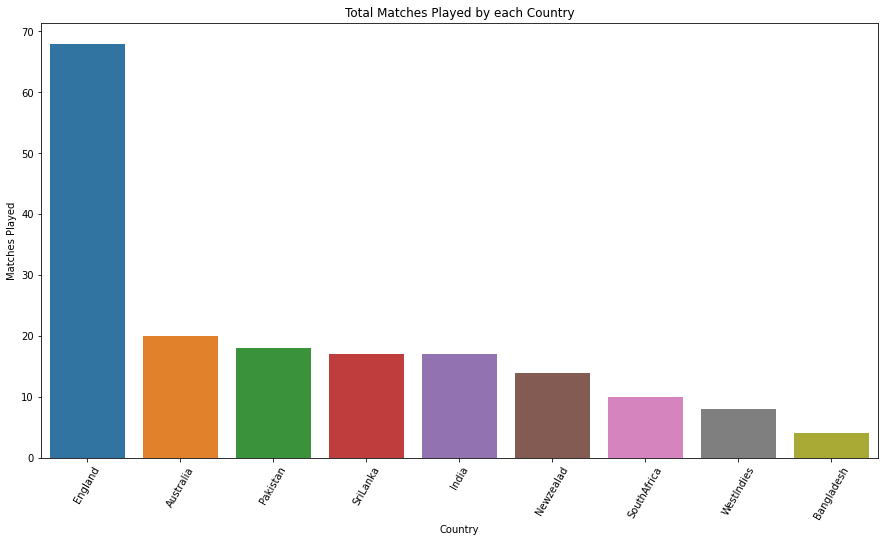

In [ ]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")

<plt.xticks(rotation = 60)

<b> Solution 1: </b>

So, England has the benifit of Home conditions and even playing many matches over there, they will get used to those pitches and can understand the conditions of pitches very well.

After England, it's Aussies which played many mathces in those conditions.

In [ ]:
WC_Grounds_History.sample(5) # Samples of ground history prepared with venue and grounds

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
709,209,254/7,50.0,5.08,NaN,1,lost,v England,"Edgbaston, Birmingham",24 Jun 2016,ODI # 3753,SriLanka,8
910,1044,268/5,47.2,5.66,266.0,2,won,v New Zealand,"Sophia Gardens, Cardiff",9 Jun 2017,ODI # 3883,Bangladesh,25
714,915,16/1,4.0,4.00,249.0,2,n/r,v Sri Lanka,"County Ground, Bristol",26 Jun 2016,ODI # 3755,England,1
1097,963,322/7,50.0,6.44,NaN,1,won,v India,"Lord's, London",14 Jul 2018,ODI # 4016,England,1
1091,961,208/9,48.3,4.28,206.0,2,won,v Australia,"Old Trafford, Manchester",24 Jun 2018,ODI # 4013,England,1


In [ ]:
WC_Grounds_History.Result.value_counts() # Results stats in the given venues

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])] # Removing the '-' tag since it cannot be considered as a category
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [ ]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1

Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]

Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


<b> Q2: Winning percentages of team played:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

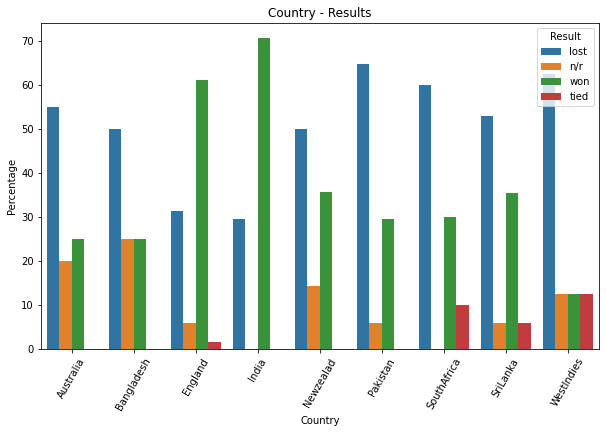

In [ ]:
# Visual representation of the ground results of each country

plt.figure(figsize=(10,6))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

<b> Solution 2: </b>

From the above figure, we can understand that,

India and England have the highest winning percentage compared to that of other Nations
Pakistan, South Africa, West Indies have the Highest Losing Percentage.
Let's see what happens when the Top Two Teams face?

Text(0.5, 0, 'England')

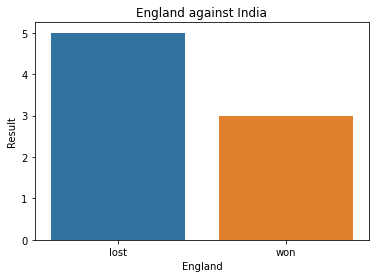

In [ ]:
''' Stats of matches played between Ind vs Eng '''

India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

Let's analyze the Win and Lose Percentage based on Innings wrt Stadium

In [ ]:
WC_Grounds_History.sample(5) # Samples of ground_history dataset

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
927,512,338/4,50.0,6.76,NaN,1,won,v India,"The Oval, London",18 Jun 2017,ODI # 3894,Pakistan,7
904,938,310,49.3,6.26,NaN,1,won,v New Zealand,"Sophia Gardens, Cardiff",6 Jun 2017,ODI # 3880,England,1
295,157,256/8,50.0,5.12,NaN,1,won,v England,"Riverside Ground, Chester-le-Street",25 May 2014,ODI # 3493,SriLanka,8
738,494,275,42.4,6.44,445.0,2,lost,v England,"Trent Bridge, Nottingham",30 Aug 2016,ODI # 3773,Pakistan,7
302,870,219,48.1,4.54,NaN,1,lost,v Sri Lanka,"Edgbaston, Birmingham",3 Jun 2014,ODI # 3496,England,1


<b> Q3: Batting first or second ? 

Text(0, 0.5, 'Winning Percentage')

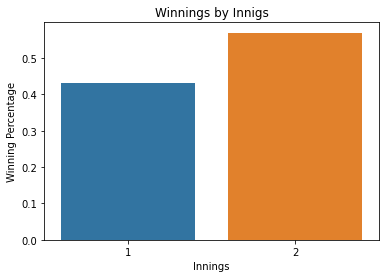

In [ ]:
''' Winning Percentage of batting first and second or bowling first and second '''

Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

<b> Solution 3: </b>

So, from the above figure, we can understand that,

Those Teams which Bowl First has won around 55% of the matches.

Let's Divide them by Pitches and see the history

In [ ]:
''' Percentage of wins according to the pitches '''

Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

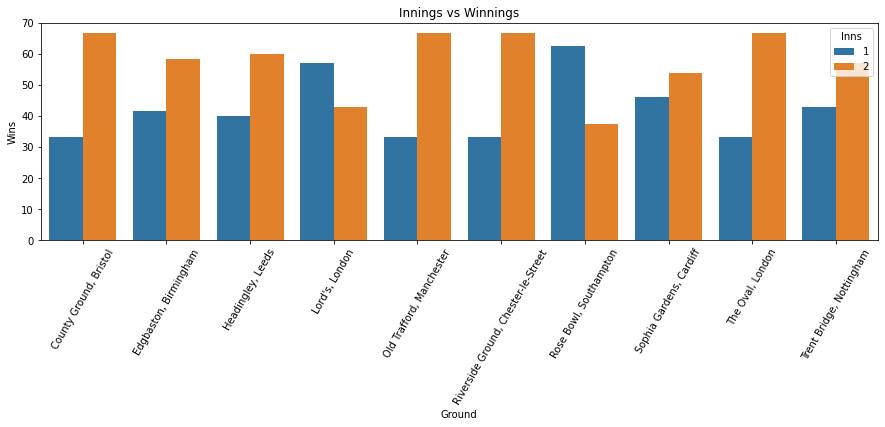

In [ ]:
''' Chart representation of the pitches '''

plt.figure(figsize=(15,4))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

<b> As we can see,

Teams that Bat second will Win most of the times.

 <b> Q4: Best Batsman who gonna perform well in WC 2019 </b>

Let's start analyzing the Batsmen and find solution best batsman with Average above 40.

In [ ]:
df_bat.sample(5) # Samples of batsmen dataset

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6675,6676,56,56,89,62.92,4,0,v Australia,Delhi,13 Mar 2019,ODI # 4113,Rohit Sharma,34102
4457,4458,8,8,7,114.28,1,0,v Australia,Birmingham,2 Jun 2017,ODI # 3876,Mitchell Santner,502714
10601,10602,22,22,28,78.57,2,1,v India,Dhaka,5 Mar 2014,ODI # 3483,Mohammad Shahzad,419873
7372,7373,4,4,5,80.00,1,0,v Australia,Lord's,12 Sep 2009,ODI # 2888,Adil Rashid,244497
8227,8228,6*,6,5,120.00,1,0,v Sri Lanka,Dhaka,19 Jan 2018,ODI # 3959,Mohammad Saifuddin,629070


In [ ]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England

df_bat.drop(columns=df_bat.columns[0],inplace=True)
df_bat = df_bat[~df_bat.Bat1.isin(["DNB","TDNB"])]
df_bat = df_bat[df_bat.Player_ID.isin(df_wc.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = df_bat[df_bat.Ground.isin(stadiums)]

In [ ]:
# Calculating Averages

''' Function to calculate the Averages scored by batsmen in ODIs'''

def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
        
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

In [ ]:
change_type = ["Runs","BF","4s","6s"]

for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
    
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

In [ ]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [ ]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [ ]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
18,David Miller,289,294,15,12,2895993,6,48.166667
57,Kusal Perera,220,286,24,1,3908203,11,20.000000
34,Imad Wasim,224,200,22,5,2277580,5,44.800000
33,Hashim Amla,851,941,94,5,746402,15,56.733333
12,Chris Gayle,1010,1315,106,27,1400760,25,40.400000


In [ ]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [ ]:
Player_WC_ID = df_bat[["Player_ID","Batsman"]].drop_duplicates() # Dropping the duplicated IDs in the dataset

In [ ]:
# Best Batsman with Average above 40

Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
df_wc.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(df_wc,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [ ]:
# Top 5 batsmen with Averages more than 40.

Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


<b> Solution 4: </b>

<b> Top 5 Batsmen based on Average, </b>

1. Imam-ul-Haq

2. Evin Lewis

3. Jason Holder

4. Ravindra Jadeja

5. Sarfaraz Ahmed

Average is good for the above since they have played very few matches and performed well in those matches.

In [ ]:
df_bowl.head() # Top samples of the bowling dataset

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
Bowler_Data = df_bowl[df_bowl.Ground.isin(stadiums)]
Bowler_Data = df_bowl[~df_bowl.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Balls
9834,9835,10.0,0.0,64.0,2.0,6.40,32.00,30.0,v England,"Sophia Gardens, Cardiff",16 Jun 2018,ODI # 4010,Jhye Richardson,774223,60.0
674,675,10.0,0.0,57.0,3.0,5.70,19.00,20.0,v England,"Lord's, London",6 Jul 2004,ODI # 2140,Chris Gayle,51880,60.0
8292,8293,10.0,0.0,64.0,0.0,6.40,-,-,v England,"The Oval, London",1 Jun 2017,ODI # 3875,Rubel Hossain,300619,60.0
2580,2581,2.0,0.0,7.0,0.0,3.50,-,-,v Sri Lanka,"The Oval, London",3 Jun 2017,ODI # 3877,JP Duminy,44932,12.0
7514,7515,10.0,1.0,46.0,4.0,4.60,11.50,15.0,v India,"Lord's, London",14 Jul 2018,ODI # 4016,Liam Plunkett,19264,60.0


<b> Q5: Best Bowlers with a good track record in case of economy:

From the above csv, What does Econ, Ave, SR stand for?

Econ : Economy of Bowler means, how many runs does the Bowler concede in one Over?

Ave : Average for a Bowler means, how many runs conceded by Bowler per wicket.

SR : Strike Rate refers to no.of balls bowled for gaining the wicket.

Mdns : Maiden Over refers that the Bowler didn't concede any run.

In [ ]:
''' Function to generate the balls bowled by bowlers to calculate the economy '''

def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [ ]:
# Listing out the bowlers' Economy, Averages and strike rates. 

Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
54,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.21875
31,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.00000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.25000
16,Dhananjaya de Silva,3.0,0.0,0.0,6.0,3.000000,inf,inf
63,Pat Cummins,433.0,4.0,15.0,474.0,5.481013,28.866667,31.60000


In [ ]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
...,...,...,...,...,...,...,...,...
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,351588
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,56007
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,8917
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,234675
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,550215


Here, If we observe <b> Bhuvneshwar Kumar </b>, His maiden Overs are less, but he bowled few overs compared to others. 

So we should consider no.of maidens per total Overs. 

Then, it's correct way to judge.

In [ ]:
# Calculate the no.of maiden overs

Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Maidens_per_Overs_Percentage
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,311158,0.504626
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,9.523810
12,Dwaine Pretorius,61.0,0.0,1.0,60.0,6.100000,61.000000,60.000000,327830,327830,0.000000
13,Faheem Ashraf,181.0,0.0,3.0,152.0,7.144737,60.333333,50.666667,681117,681117,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235,3.333333


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,230553,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,550215,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,379504,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,261354,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,56007,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,259551,5.594406


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:5] # Top bowlers with best economy

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Maidens_per_Overs_Percentage
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,272279,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,42657,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,430246,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,1.960784


<b> Solution 5: </b>

<b> The 5 best bowlers with the quality economy: </b>

1. Nathan Lyon

2. Shoaib Malik

3. Bhuvaneshwar Kumar

4. Yuzvendra Chahal

5. Angelo Mathews

<b> Conclusion: </b>

In this blog post, we had a glimpse of what were the most interesting key factors to look after to play the cricket world cup 2019. Summarizing them would be:


1. Team <b>England</b> has the home advantage of playing more matches under those conditions followed by <b>Australia and Pakistan. </b>

2. The percentages of matches won tags the teams <b>England and India</b> in the top two spots with 70 and 60 respectively.

3. The team that falls under the category of <b>batting second</b> has a higher chance/percentage of winning the match.

4. <b>Asian players</b> dominate the batting averages along with players from <b>West Indies</b> as far as ODI cricket is concerned.

5. With respect to the bowling unit, it's a pure takeover by the Asian players whereas an <b>Australian player tops the table.
